In [1]:
import numpy as np

In [2]:
def CSVtoList(tsvFile):
    import csv
    #Create a container for the tsv
    tsvList = []
    #Open the .tsv file and append it to a python list
    with open(tsvFile,'rb') as tsvIn:
        tsvIn = csv.reader(tsvIn, delimiter=',')
        for row in tsvIn:
            tsvList.append(row)
    return tsvList

In [3]:
filePath = "C:/Users/Simon/Documents/Skole/Master/participants/Participant Information.csv"
responses = CSVtoList(filePath)
headers = responses[0]
responses = responses[1:]

In [4]:
index = 0
for header in headers:
    print index, header
    index += 1

0 Timestamp
1 Participant ID (Written by facilitator)
2 What is your gender?
3 What is your age?
4 What is your native language?
5 Do you wear optics?
6 Are you left or right handed?
7 Are you color blind?
8 What is your current profession?
9 If you have selected "Other" please specify which profession.
10 How many years ago did you start process modeling?
11 What was the first process modeling language you learned?
12 What process modeling languages did you learn?
13 Which process modeling language are you using mainly?
14 How many process models have you analysed or read within the last 12 months? (A year has about 250 work days. In case you read one model per day, this would sum up to 250 models per year)
15 How many process models have you created or edited within the last 12 months?
16 How many activities did all these models have on average?
17 How many work days of formal training on process modelling have you received within the last 12 months? (This includes e.g. University le

In [5]:
responses[-1][1] = "p465b"
del responses[10] #delete chinese guy

In [6]:
del responses[3] #random guy which data does not work in the experiment

In [7]:
responses[7][10] = 0.5
responses[8][10] = 0.5

In [8]:
for participant in responses:
    print participant[10]

7
20
0
0.5
.25
0
3
0.5
0.5
1
1
0
3


In [9]:
index = 0
for participant in responses:
    print index, participant[1]
    index += 1

0 p665a
1 p847b
2 p786a
3 p024a
4 p741b
5 p551a
6 p338b
7 p057a
8 p768b
9 p846a
10 p876a
11 p335b
12 p465b


In [10]:
responsesA = []
responsesB = []
for participant in responses:
    if participant[1][4] == "a":
        responsesA.append(participant)
    else:
        responsesB.append(participant)

In [11]:
responseList = [responsesA, responsesB]

In [12]:
ageList = []
for participant in responses:
    ageList.append(int(participant[3]))
print min(ageList), "%0.2f" % (np.mean(ageList)), max(ageList)

21 26.77 42


2.82692307692


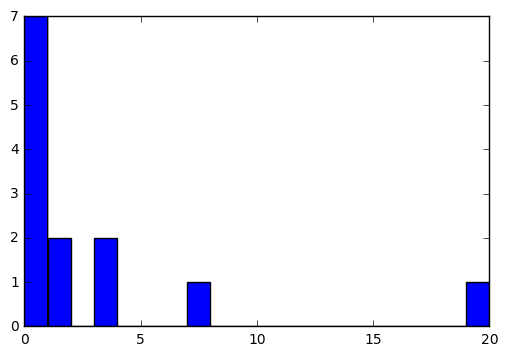

In [13]:
experienceList = []
for participant in responses:
    experienceList.append(float(participant[10]))
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(experienceList,20,)
print np.mean(experienceList)

In [14]:

group = "Group A - Mean experience:"
for rList in responseList:
    meanList = []
    for participant in rList:
        meanList.append(float(participant[10]))
        print participant[10]
    print len(meanList)
    print str(group), np.mean(meanList)
    group = "Group B - Mean experience:"

7
0
0.5
0
0.5
1
1
7
Group A - Mean experience: 1.42857142857
20
.25
3
0.5
0
3
6
Group B - Mean experience: 4.45833333333


In [15]:
def inputScore(inputString):
    if inputString is "Strongly disagree":
        return 1
    elif inputString == "Disagree":
        return 2
    elif inputString == "Somewhat disagree":
        return 3
    elif inputString == "Neutral":
        return 4
    elif inputString == "Somewhat agree":
        return 5
    elif inputString == 'Agree':
        return 6
    elif inputString == "Strongly agree":
        return 7
    print "Something is not right"

In [16]:
def responseScore(responseInput):
    score1 = []
    score2 = []
    score3 = []
    for participant in responseInput:
        participantAnswer1 = participant[19]
        participantAnswer2 = participant[20]
        participantAnswer3 = participant[21]
        score1.append(inputScore(participantAnswer1))
        score2.append(inputScore(participantAnswer2))
        score3.append(inputScore(participantAnswer3))
    return score1,score2,score3

In [17]:
familiarityA, confidentA, competentA = responseScore(responsesA)
familiarityB, confidentB, competentB = responseScore(responsesB)

In [18]:
foreknowledgeA = []
for index in xrange(len(familiarityA)):
    foreknowledgeA.append(np.mean([familiarityA[index],confidentA[index],competentA[index]]))
    
    
foreknowledgeB = []
for index in xrange(len(familiarityB)):
    foreknowledgeB.append(np.mean([familiarityB[index],confidentB[index],competentB[index]]))

foreknowledge = foreknowledgeA+foreknowledgeB

In [19]:
print "Variance\tMinimum\tMaximum\t"
print "%0.2f" % (np.var(foreknowledge))+"\t"+"%0.2f" % (min(foreknowledge))+"\t"+str(max(foreknowledge))
print "Group\tMean\tN\tStd. Deviation\tMedian\tStd. Error of Mean"
print "A\t"+"%0.2f" % (np.mean(foreknowledgeA),)+"\t"+str(len(foreknowledgeA))+"\t"+"%0.2f" % (np.std(foreknowledgeA),)+"\t\t"+"%0.2f" % (np.median(foreknowledgeA),)+"\t%0.2f" % (np.std(foreknowledgeA, ddof=1),)
print "B\t"+"%0.2f" % (np.mean(foreknowledgeB),)+"\t"+str(len(foreknowledgeB))+"\t"+"%0.2f" % (np.std(foreknowledgeB),)+"\t\t"+"%0.2f" % (np.median(foreknowledgeB),)+"\t%0.2f" % (np.std(foreknowledgeB, ddof=1),)

Variance	Minimum	Maximum	
1.17	2.67	7.0
Group	Mean	N	Std. Deviation	Median	Std. Error of Mean
A	6.10	7	0.73		6.00	0.79
B	5.39	6	1.28		5.83	1.41


In [20]:
import scipy.stats as stats
print stats.shapiro(foreknowledgeA)
print stats.shapiro(foreknowledgeB)

(0.9224589467048645, 0.4887372553348541)
(0.7877536416053772, 0.04547511041164398)


In [21]:
stats.mannwhitneyu(foreknowledgeA, foreknowledgeB)

MannwhitneyuResult(statistic=13.5, pvalue=0.15356471373217878)

In [22]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=1, ddof=1)
    tscores = itemscores.sum(axis=0)
    nitems = len(itemscores)

    return nitems / (nitems-1.) * (1 - itemvars.sum() / tscores.var(ddof=1))

In [23]:
print CronbachAlpha([familiarityA, confidentA, competentA])
print CronbachAlpha([familiarityB, confidentB, competentB])

0.910256410256
0.962476547842


In [24]:
print CronbachAlpha([familiarityA[:-1], confidentA[:-1], competentA[:-1], familiarityB, confidentB, competentB])

0.929032258065


In [25]:
print CronbachAlpha([foreknowledgeA[:-1], foreknowledgeB])

0.777777777778
